In [1]:
import os
import zipfile

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
local_zip = '/content/drive/MyDrive/scalp_image_model.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

In [4]:
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
base_dir = '/content'

train_dir = os.path.join(base_dir,'training')
val_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')

In [6]:
train_bd_train_dir = os.path.join(train_dir,'bd_train')
train_hb_train_dir = os.path.join(train_dir,'hb_train')
train_tm_train_dir = os.path.join(train_dir,'tm_train')   
train_pj_train_dir = os.path.join(train_dir,'pj_train')
train_gj_train_dir = os.path.join(train_dir,'gj_train')

In [7]:
train_bd_dir = os.path.join(train_bd_train_dir,'zbd')
train_hb_dir = os.path.join(train_hb_train_dir,'zhb')
train_tm_dir = os.path.join(train_tm_train_dir,'ztm')
train_pj_dir = os.path.join(train_pj_train_dir,'zpj')
train_gj_dir = os.path.join(train_gj_train_dir,'zgj')

In [8]:
val_bd_val_dir = os.path.join(val_dir,'bd_val')
val_hb_val_dir = os.path.join(val_dir,'hb_val')
val_tm_val_dir = os.path.join(val_dir,'tm_val')   
val_pj_val_dir = os.path.join(val_dir,'pj_val')
val_gj_val_dir = os.path.join(val_dir,'gj_val')

In [9]:
val_bd_dir = os.path.join(val_bd_val_dir,'zbd')
val_hb_dir = os.path.join(val_hb_val_dir,'zhb')
val_tm_dir = os.path.join(val_tm_val_dir,'ztm')   
val_pj_dir = os.path.join(val_pj_val_dir,'zpj')
val_gj_dir = os.path.join(val_gj_val_dir,'zgj')

In [10]:
test_bd_test_dir = os.path.join(test_dir,'bd_test')
test_hb_test_dir = os.path.join(test_dir,'hb_test')
test_tm_test_dir = os.path.join(test_dir,'tm_test')
test_pj_test_dir = os.path.join(test_dir,'pj_test')
test_gj_test_dir = os.path.join(test_dir,'gj_test')

In [11]:
test_bd_dir = os.path.join(test_dir,'zbd')
test_hb_dir = os.path.join(test_dir,'zhb')
test_tm_dir = os.path.join(test_dir,'ztm')
test_pj_dir = os.path.join(test_dir,'zpj')
test_gj_dir = os.path.join(test_dir,'zgj')

In [12]:
train_bd_fnames=os.listdir(train_bd_dir)
train_hb_fnames=os.listdir(train_hb_dir)
train_tm_fnames=os.listdir(train_tm_dir)
train_pj_fnames=os.listdir(train_pj_dir)
train_gj_fnames=os.listdir(train_gj_dir)

In [13]:
val_bd_fnames=os.listdir(val_bd_dir)
val_hb_fnames=os.listdir(val_hb_dir)
val_tm_fnames=os.listdir(val_tm_dir)
val_pj_fnames=os.listdir(val_pj_dir)
val_gj_fnames=os.listdir(val_gj_dir)

In [14]:
batch_size = 32
epochs = 20
IMG_HEIGHT = 128
IMG_WIDTH = 128

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

In [16]:
train_gen = train_datagen.flow_from_directory(batch_size=batch_size,
                                              directory=train_pj_train_dir,
                                              shuffle=True,
                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                              class_mode='binary')

Found 1600 images belonging to 2 classes.


In [17]:
val_gen = test_datagen.flow_from_directory(batch_size=batch_size,
                                          directory=val_pj_val_dir,
                                          shuffle=True,
                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                          class_mode='binary')

Found 400 images belonging to 2 classes.


In [18]:
sample_training_images, _ = next(train_gen)
sample_val_images, _ = next(val_gen)

In [19]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

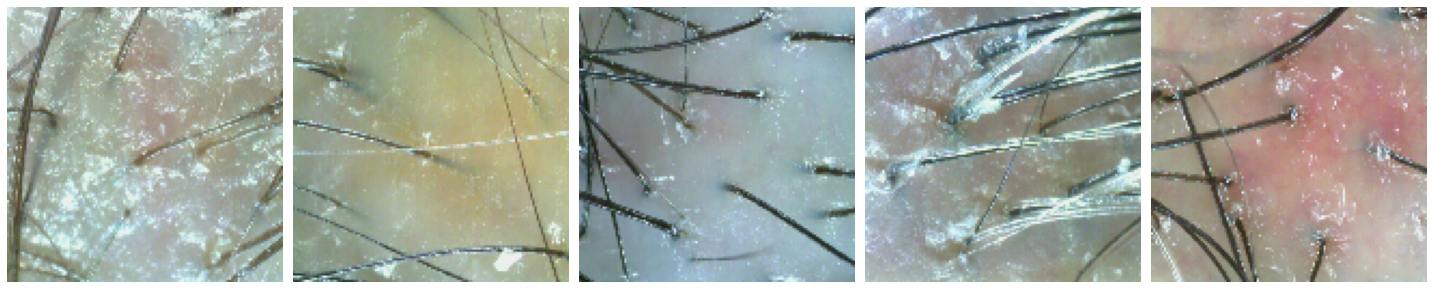

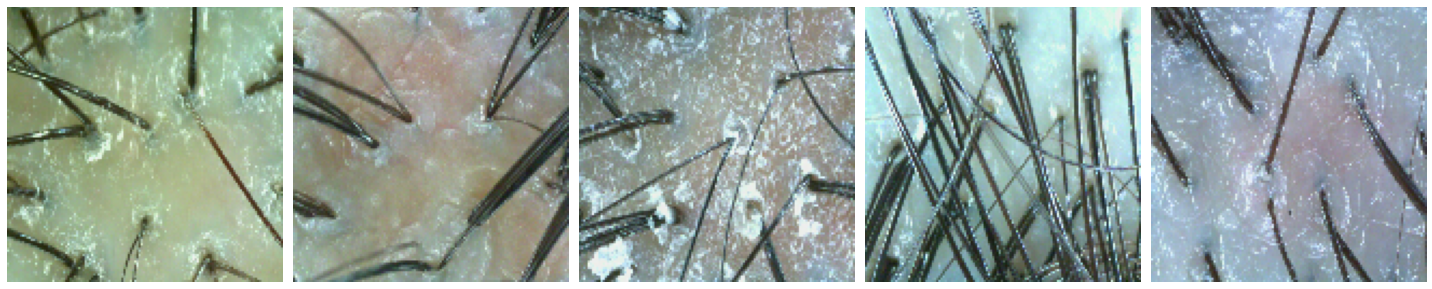

In [20]:
import matplotlib.pyplot as plt
plotImages(sample_training_images[:5])
plotImages(sample_val_images[:5])

In [21]:
from tensorflow.keras.applications import VGG19

VGG = VGG19(weights = 'imagenet', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), include_top = False)
VGG.summary()

80150528/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
______________________________________________________________

In [22]:
for layer in VGG.layers[:-4]:
    layer.trainable = False

In [23]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(VGG)
model.add(Dropout(0.3))
model.add(Conv2D(filters = 256, kernel_size = 3, activation='relu',input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(Dropout(0.3))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2D(filters = 128, kernel_size = 3, padding="SAME", activation = 'relu', kernel_regularizer = l2(0.001)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2D(filters = 64, kernel_size = 3, padding="SAME", activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2D(filters = 32, kernel_size = 3, padding="SAME", activation = 'relu', kernel_regularizer = l2(0.001)))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 512)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 2, 2, 256)         1179904   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 2, 256)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 256)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 1, 256)         0         
_________________________________________________________________
dense (Dense)                (None, 1, 1, 128)         3

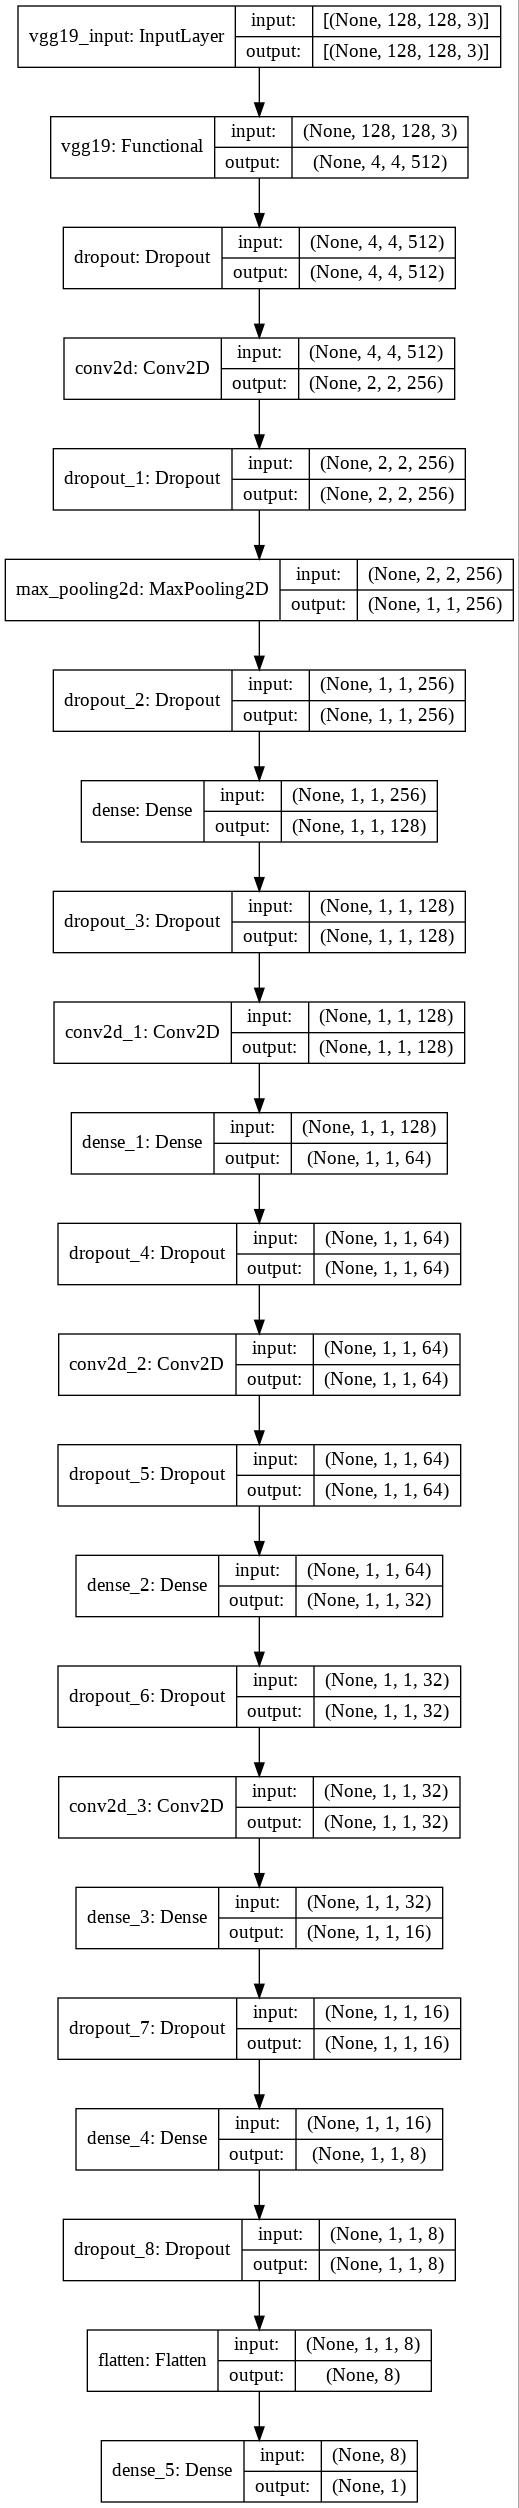

In [25]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file = 'model.jpg', show_shapes = True)

In [26]:
from datetime import datetime
import os
import keras

In [27]:
save_dir = '/content/drive/MyDrive/'
project_name = 'pj_CNN_model'

In [28]:
def save_file():
  time = datetime.today()
  yy = time.year
  mon = time.month
  time_name = str(yy) + str(mon) + '_my_' + project_name + '.h5'
  file_name = os.path.join(save_dir, time_name)
  return file_name

In [29]:
callbacks = [
             keras.callbacks.TensorBoard(
                 log_dir = save_dir,
                 write_graph = True,
                 write_images = True
             ),
             keras.callbacks.EarlyStopping(
                 monitor = 'val_acc',
                 patience = 10
             ),
             keras.callbacks.ModelCheckpoint(
                 filepath = save_file(),
                 monitor = 'val_loss',
                 save_best_only = True
             )
]

In [30]:
history = model.fit(
    train_gen,
    steps_per_epoch= 1000//batch_size,
    epochs = 50,
    validation_data = val_gen,
    validation_steps= 152//batch_size,
    callbacks = callbacks
)

Epoch 1/50
31/31 [==============================] - 28s 303ms/step - loss: 0.8366 - acc: 0.4980 - val_loss: 0.8242 - val_acc: 0.5000
Epoch 2/50
31/31 [==============================] - 8s 260ms/step - loss: 0.8143 - acc: 0.5212 - val_loss: 0.8059 - val_acc: 0.4688
Epoch 3/50
31/31 [==============================] - 8s 259ms/step - loss: 0.7981 - acc: 0.5010 - val_loss: 0.7891 - val_acc: 0.5000
Epoch 4/50
31/31 [==============================] - 8s 259ms/step - loss: 0.7823 - acc: 0.4869 - val_loss: 0.7747 - val_acc: 0.4609
Epoch 5/50
31/31 [==============================] - 8s 260ms/step - loss: 0.7671 - acc: 0.4990 - val_loss: 0.7638 - val_acc: 0.4453
Epoch 6/50
31/31 [==============================] - 8s 258ms/step - loss: 0.7578 - acc: 0.4768 - val_loss: 0.7502 - val_acc: 0.4922
Epoch 7/50
31/31 [==============================] - 8s 260ms/step - loss: 0.7428 - acc: 0.5121 - val_loss: 0.7388 - val_acc: 0.4844
Epoch 8/50
31/31 [==============================] - 8s 258ms/step - loss: 0

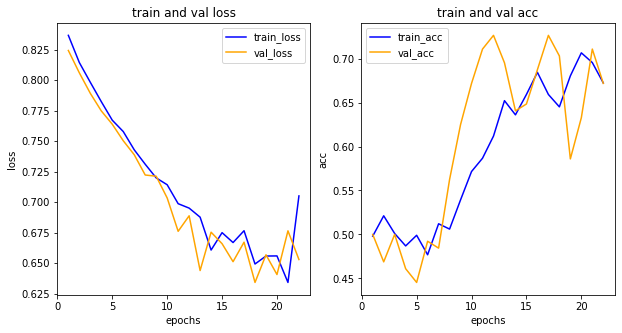

In [31]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))


ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']


ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [32]:
test_gen = test_datagen.flow_from_directory(batch_size=batch_size,
                                          directory=test_pj_test_dir,
                                          shuffle=True,
                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                          class_mode='binary')

Found 69 images belonging to 2 classes.


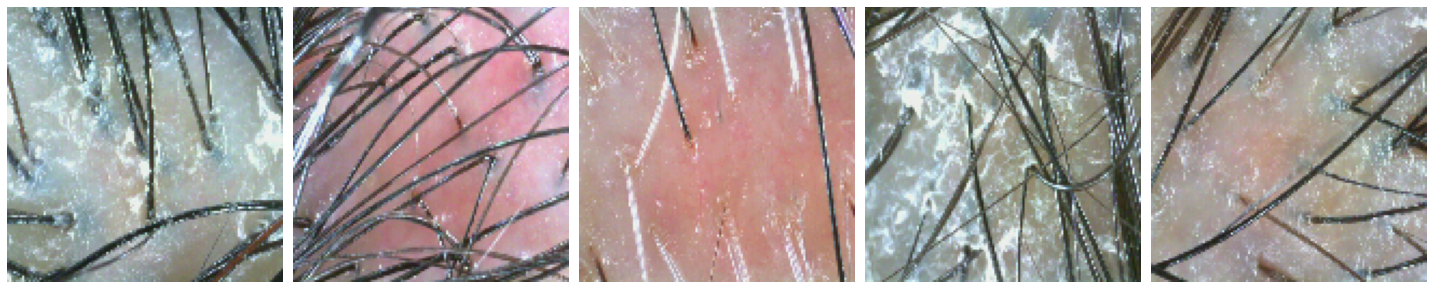

In [33]:
sample_test_images, _ = next(test_gen)
plotImages(sample_test_images[:5])

In [34]:
model.predict(sample_test_images[0].reshape(1,128,128,3))

array([[0.89489824]], dtype=float32)

In [35]:
model.predict(sample_test_images[1].reshape(1,128,128,3))

array([[0.5408038]], dtype=float32)

In [36]:
model.predict(sample_test_images[2].reshape(1,128,128,3))

array([[0.4947085]], dtype=float32)

In [37]:
model.predict(sample_test_images[3].reshape(1,128,128,3))

array([[0.49471095]], dtype=float32)

In [38]:
model.predict(sample_test_images[4].reshape(1,128,128,3))

array([[0.5136354]], dtype=float32)